In [132]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, expanduser

from cycler import cycler
import os

In [112]:

fontdict = {'fontsize':16, 'fontweight':'bold'}

expt_dir = join(expanduser('~'), 'catkin_ws', 'src', 'gps', 'experiments')
expt_name = 'mjc_mdgps_antagonist_y1e-1'
expt = join(expt_dir, expt_name)

In [173]:
def costs_plotter(cost_array, show=False, save=None, save_dir=None, expt_name='box2d_arm_example'):
    f, ax = plt.subplots(1, 1)   
    t = np.arange(len(cost_array))
    
    if save_dir is None:
        save_dir = join(expanduser('~'), 'Documents', 'Papers', 'iDG_Journal', 'ICML_figs')
                        
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)    
    fontdict = {'fontsize':16, 'fontweight':'bold'}
    
    ax.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'r']))
    if isinstance(cost_array, tuple):
        i = 0
        for cost in cost_array:
            t = np.arange(len(cost))
            ax.plot(t, cost, linewidth=8, label = 'Cond '+ str(i))
            i += 1
    else:
        ax.plot(t, cost_array, linewidth=8, color='orange')#, fontdict=fontdict)
    
    ax.set_xlabel('Number of Iterations',fontdict=fontdict)
    ax.set_ylabel('Cost per iteration',fontdict=fontdict)
    
    ax.legend(loc=(1,0.80), fontsize=20)
    
    ax.set_title(expt_name, fontdict)
    
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    
#     plt.gca().set_xlim(left=1.7, right=43)
#     plt.gca().set_ylim(bottom=0., top=1.)

    plt.gcf().set_size_inches(16, 9)
    plt.grid()
                        
    if show:
        plt.show()
    if save:
        f.savefig(save_dir + '/' + save + '.png')
        f.savefig(save_dir + '/' + save + '.svg')

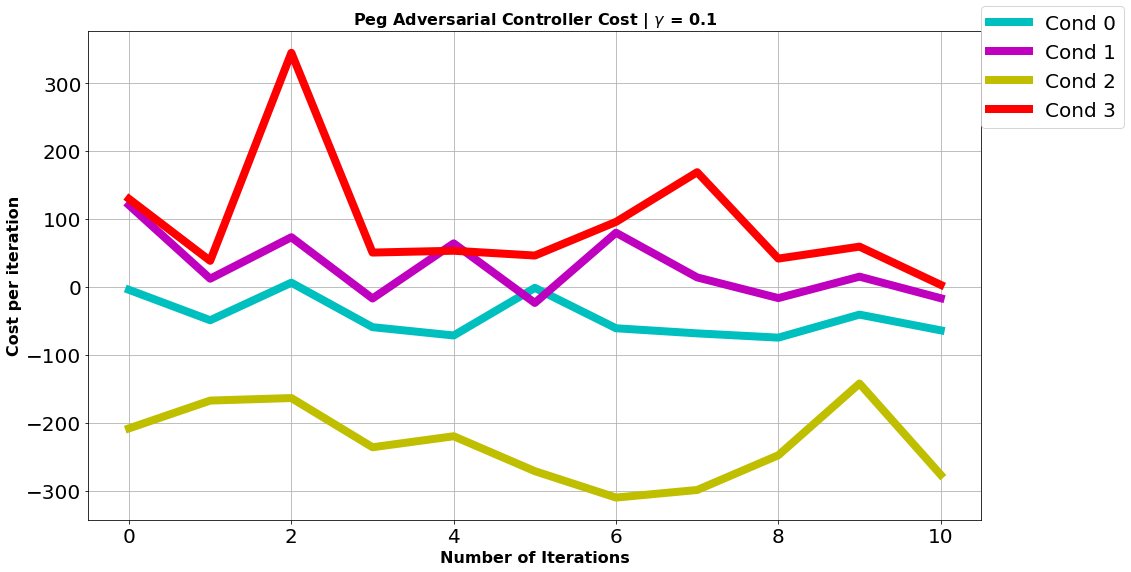

In [174]:
costs = np.loadtxt(join(expt, 'costs.txt'))
# print(costs)
# separate the costs into the four conditions
cost_idx1 = range(0, costs.size, 4)
cost_idx2 = range(1, 44, 4)
cost_idx3 = range(2, 44, 4)
cost_idx4 = range(3, 44, 4)

cost_cond1 = costs[cost_idx1]
cost_cond2 = costs[cost_idx2]
cost_cond3 = costs[cost_idx3]
cost_cond4 = costs[cost_idx4]

costs_combo = (cost_cond1, cost_cond2, cost_cond3, cost_cond4)
        
costs_plotter(costs_combo, save='Adversarial_Cost_ypt1', 
              expt_name='Peg Adversarial Controller Cost | $\gamma$ = 0.1')

#### This is for the protagonist experiment

In [50]:
control_u = np.loadtxt(join(expt, 'control_u.txt'))
# plot control laws per iteration for each condition
# condition 1 ]
# print(control_u)
    

In [177]:
def plot_joint_controls(u_cond, title=None, fontdict=None, savefile=None, save_dir=None):
    
    if save_dir is None:
        save_dir = join(expanduser('~'), 'Documents', 'Papers', 'iDG_Journal', 'ICML_figs')
                        
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  
        
    for i in range(u_cond.shape[-1]):
        plt.plot(range(u_cond.shape[0]),  u_cond[:,i], label='Joint {}'.format(i+1), linewidth=8)
    plt.legend(loc=(1,0.5))
    plt.title(title, fontdict=fontdict)
    plt.xlabel('Number of Iterations', fontdict=fontdict)
    plt.ylabel('Torque (Nm)', fontdict=fontdict)
    
    #plt.gcf().set_size_inches(8, 5)
    plt.gcf().set_size_inches(16, 9)
    plt.grid()
    
    if savefile:
        plt.savefig(save_dir + '/' + savefile + '.png')
        plt.savefig(save_dir + '/' + savefile + '.svg')
        
    plt.show()

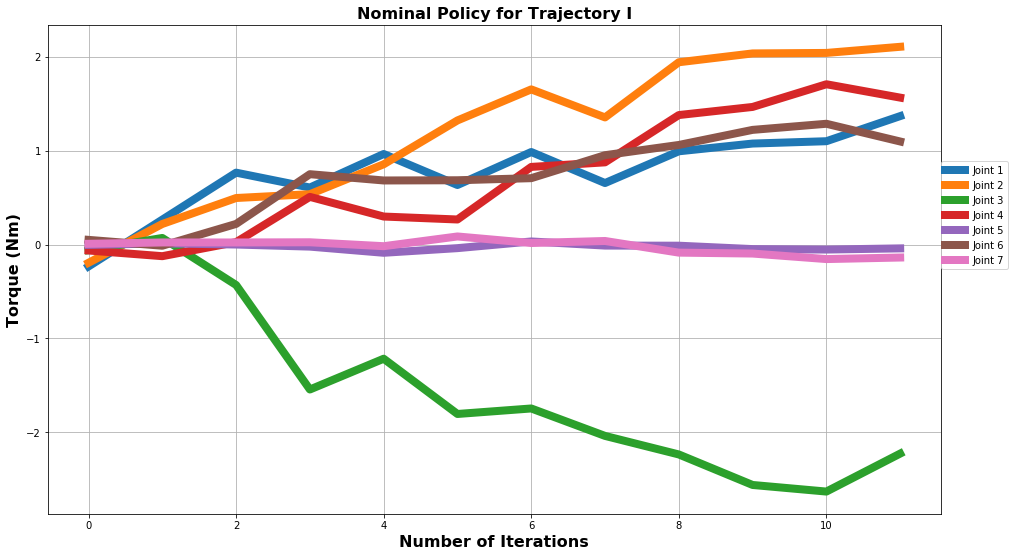

In [178]:
u_cond1 = control_u[:, range(7)]
u_cond2 = control_u[:, range(7, 14)]
u_cond3 = control_u[:, range(14, 21)]
u_cond4 = control_u[:, range(21, 28)]
u_cond5 = control_u[:, range(28, 35)]

plot_joint_controls(u_cond1, title='Nominal Policy for Trajectory I',
                        savefile='Protagonist_Torques', fontdict=fontdict)

# for i in range(u_cond1.shape[-1]):
#     plt.plot(range(u_cond1.shape[0]),  u_cond1[:,i], label='Joint {}'.format(i+1), linewidth=8)
# plt.legend(loc=(1,0.5))
# plt.title('Nominal Policy for Trajectory I', fontdict=fontdict)
# plt.xlabel('Number of Iterations', fontdict=fontdict)
# plt.ylabel('Torque (Nm)', fontdict=fontdict)

# plt.show()

In [7]:
costs_plotter(cost, show=False, save='protagonist', expt_name=expt_name)

NameError: name 'cost' is not defined

In [164]:
expt_name = 'Pendulum $\gamma$ = 0.5'
costs = [
[1293.199832441632, -356.37077226672261, -325.21620215648824, -342.62118323929906],
[1651.0784232499504, -357.60684748312923, -419.85712120312047, -386.19617112958207],
[-174.68318952321647, -315.88862412575816, -263.42591679519336, -242.86728257105241],
[-502.47719686147627, -513.43755066820609, -500.42442080387025, -403.11998090797886],
[-544.43722254784166, -499.68734613993485, -532.93952994553035, -483.91167497893696],
[-558.36496893122421, -506.26553180958228, -539.01774395658435, -512.260414584655],
[-564.04259411097871, -398.49276221196578, -528.4803948737781, -519.94916506947527],
[25303.759076246126, -395.95658724582705, 176.83617916968902, -532.0119748639604],
[86004.673648318625, -386.75576288056175, -452.92770523560483, -527.68879799517026],
[170.0162219478363, -517.54693183019504, -520.77281869921057, -535.43402731951358],
[-52.905787921642784, -462.96351173698929, -538.0481423738205, -522.944740773489],
[86004.673648318625, -386.75576288056175, -452.92770523560483, -527.68879799517026],
[-52.905787921642784, -462.96351173698929, -538.0481423738205, -522.944740773489],
[170.0162219478363, -517.54693183019504, -520.77281869921057, -535.43402731951358],
[170.0162219478363, -517.54693183019504, -520.77281869921057, -535.43402731951358]
]
cost = np.array(costs)
cost = np.mean(cost, 1)
# with open(join(expt_dir, expt_name) + '/costs.txt') as f:
#     w, h = [int(x) for x in next(f).split()]
#     costs = [[int(x) for x in line.split()] for line in f]
print(cost)

[    67.24791869    121.85457086   -249.21625325   -479.86478731
   -515.2439434    -528.97716482   -502.74122907   6138.15667333
  21159.32534555   -350.93438898   -394.2155457   21159.32534555
   -394.2155457    -350.93438898   -350.93438898]


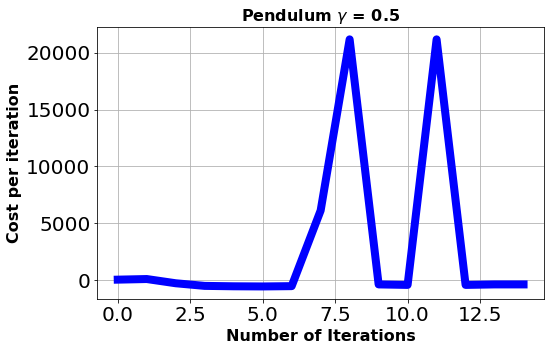

In [165]:
costs_plotter(cost,  save=None, expt_name=expt_name)

In [64]:
phi = np.array((1, 2, 3, 4))
phi_dot = np.sign(phi)
print(phi_dot)

s = [3 for x in range(4)]
s

[1 1 1 1]


[3, 3, 3, 3]

In [69]:
lvv_t2= np.tile(np.diag(2 * 1e-6 * np.array([1, 1])), [100, 3.5, 3]) #shape (100, 7, 7)
lvv_t2.shape

TypeError: 'float' object cannot be interpreted as an integer